# Conformal prediction for Regressors

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [5]:
housing = fetch_california_housing(data_home='data/california_housing')
print(f"Shapes: {housing.data.shape}, {housing.target.shape}")
print("Feature names:", housing.feature_names)
print("Target names:", housing.target_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
# Treure random_state

In [10]:
X, y = housing.data, housing.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
learning_rate = 0.1
n_estimators = 200

In [17]:
loss = 'quantile'

In [30]:
upper_alpha = 0.95
lower_alpha = 1-upper_alpha
print("Coverage: %.2f" % (upper_alpha-lower_alpha))

Coverage: 0.90


lq = lower quantile\
uq = upper quantile

In [48]:
gbr_lq = GradientBoostingRegressor(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, alpha=lower_alpha)
gbr_uq = GradientBoostingRegressor(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, alpha=upper_alpha)
gbr = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators)

gbr_lq.fit(X_train, y_train)
gbr_uq.fit(X_train, y_train)
gbr.fit(X_train, y_train)

print("Done")

Done


In [49]:
y_lower = gbr_lq.predict(X_val)
y_upper = gbr_uq.predict(X_val)
y_pred = gbr.predict(X_val)

**No hi ha manera de visualitzar-ho bé**

In [53]:
#fig = plt.figure(figsize=(10, 10))
#plt.plot(X_val, y_val, "b.", markersize=10, label="Test observations")
#plt.plot(X_val, y_upper, "k-")
#plt.plot(X_val, y_lower, "k-")
#plt.fill_between(
#    X_val.ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% interval"
#)
#plt.xlabel("$x$")
#plt.ylabel("$f(x)$")
#plt.ylim(-10, 25)
#plt.legend(loc="upper left")
#plt.show()

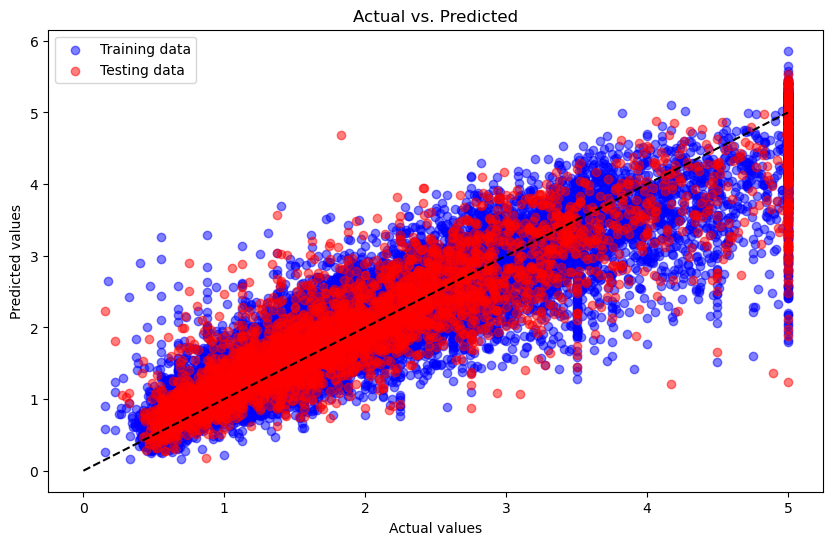

In [51]:
# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, gbr.predict(X_train), color='blue', alpha=0.5, label='Training data')
# Scatter plot for testing data
plt.scatter(y_val, gbr.predict(X_val), color='red', alpha=0.5, label='Testing data')

# Plotting the perfect fit line
max_val = max(y_train.max(), y_val.max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.show()


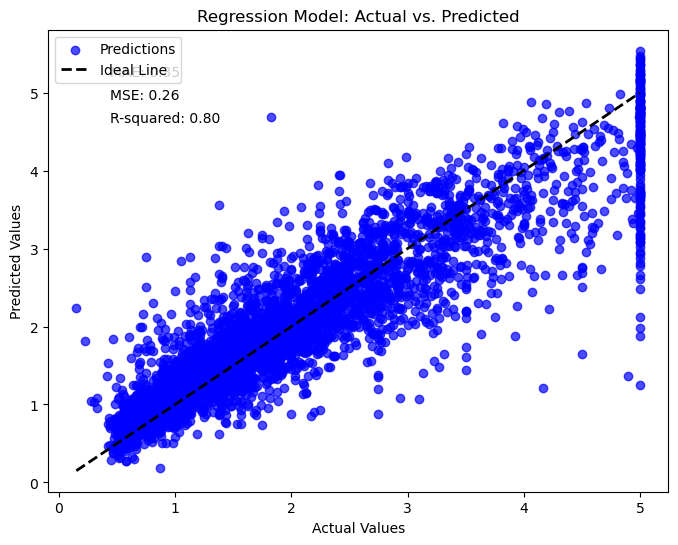

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have y_test (actual values) and y_pred (predicted values)
# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='b', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs. Predicted')
plt.legend()

# Display evaluation metrics
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes)

plt.show()